In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [2]:
train_idx = ((np.argmax(mnist.train.labels, 1) == 7) | (np.argmax(mnist.train.labels, 1) == 9))
test_idx = ((np.argmax(mnist.test.labels, 1) == 7) | (np.argmax(mnist.test.labels, 1) == 9))

train_imgs   = mnist.train.images[train_idx]
train_labels = mnist.train.labels[train_idx]
test_imgs    = mnist.test.images[test_idx]
test_labels  = mnist.test.labels[test_idx]

n_train      = train_imgs.shape[0]
n_test       = test_imgs.shape[0]

print ("Packages loaded")
print ("The number of train images : {}, shape : {}".format(n_train, train_imgs.shape))
print ("The number of test images : {}, shape : {}".format(n_test, test_imgs.shape))

Packages loaded
The number of train images : 11169, shape : (11169, 784)
The number of test images : 2037, shape : (2037, 784)


In [0]:
def build_network(x):
  conv1=tf.layers.conv2d(inputs=x,filters=32,kernel_size=[3,3],padding='SAME',kernel_initializer=tf.initializers.glorot_normal(),activation=tf.nn.relu)
  maxp1=tf.layers.max_pooling2d(inputs=conv1,pool_size=[2,2],strides=(2,2))
  
  conv2=tf.layers.conv2d(inputs=maxp1,filters=64,kernel_size=[3,3],padding='SAME',kernel_initializer=tf.initializers.glorot_normal(),activation=tf.nn.relu)
  maxp2=tf.layers.max_pooling2d(inputs=conv2,pool_size=[2,2],strides=(2,2))
  
  reduce_in=tf.reduce_sum(maxp2,axis=(1,2))
  output=tf.layers.dense(inputs=reduce_in,units=2,kernel_initializer=tf.initializers.glorot_normal())
  return maxp2, output
  
  

In [0]:
x=tf.placeholder(tf.float32,[None,28,28,1])
y=tf.placeholder(tf.float32,[None,2])

In [0]:
maxp2,pred=build_network(x)
loss=tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y)
loss=tf.reduce_mean(loss)

opt=tf.train.AdamOptimizer(0.001).minimize(loss)
sess=tf.Session()
sess.run(tf.global_variables_initializer())


In [0]:
def get_batch(image,label,batch_size=64):
  idx=np.random.choice(image.shape[0],batch_size)
  return image[idx],label[idx]

In [0]:
def preprocessing(train_label):
  result=np.zeros((train_label.shape[0],2))
  for idx,ohe in enumerate(train_label):
    if np.argmax(ohe)==7:
      result[idx][0]=1.
    else:
      result[idx][1]=1.
      
      
  return result

train_label=preprocessing(train_labels)

In [23]:
for i in range(3000):
  train_x,train_y=get_batch(train_imgs.reshape(-1,28,28,1),train_label)
  _,l=sess.run([opt,loss],feed_dict={x:train_x,y:train_y})
  print(l)
  


1.5393308
0.8201345
0.94991404
0.6456929
0.6104929
0.7941798
0.57833207
0.6364501
0.6256058
0.65661955
0.6265221
0.61212885
0.571335
0.5700222
0.5694085
0.59748787
0.56309783
0.52388984
0.539567
0.52529967
0.52516973
0.54408234
0.5671525
0.5343409
0.51413465
0.48080495
0.48208255
0.541687
0.5103095
0.4983328
0.502013
0.49833894
0.49366397
0.4621028
0.42851466
0.45821512
0.4345054
0.42622095
0.42618716
0.44693944
0.42723915
0.38395703
0.41568762
0.39261523
0.36945978
0.3909072
0.36092663
0.39300764
0.38275802
0.37100917
0.38436824
0.36095244
0.43557984
0.39772302
0.30527556
0.38749516
0.33842462
0.3539059
0.3615725
0.293197
0.32031488
0.28269076
0.30189976
0.28889087
0.31046715
0.28581727
0.24715692
0.39045966
0.2613203
0.2704045
0.25030354
0.28222418
0.34248185
0.284903
0.31058088
0.24036089
0.28833076
0.25484276
0.22681317
0.23076192
0.2879626
0.23014791
0.2076429
0.271957
0.20585084
0.2125574
0.2430274
0.23087876
0.1850597
0.36084643
0.19051668
0.25313613
0.2846321
0.22610542
0.16195

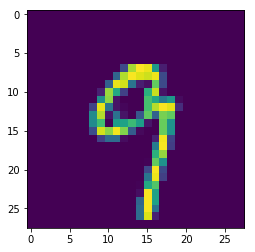

[1]
[[ 0.1017471   0.23479448]
 [ 0.31023958 -0.14888664]
 [ 0.34287015  0.0704185 ]
 [ 0.23286806 -0.08627521]
 [-0.25539973  0.51669   ]
 [ 0.11890689 -0.03298495]
 [ 0.3259686   0.01080343]
 [ 0.2269389  -0.11737715]
 [ 0.14847368 -0.29568726]
 [ 0.08682371 -0.140996  ]
 [ 0.28577858 -0.0202446 ]
 [ 0.05775345 -0.19482411]
 [ 0.2219529  -0.03608697]
 [ 0.01001714 -0.30713785]
 [ 0.4549865  -0.15350631]
 [ 0.12890175 -0.33868775]
 [-0.05911003 -0.2159551 ]
 [-0.07274481 -0.21243948]
 [ 0.25756717 -0.17726383]
 [ 0.03721345  0.09984604]
 [-0.22270904 -0.12667204]
 [ 0.3173456  -0.28289416]
 [-0.16914333  0.10380987]
 [ 0.31939206 -0.21880434]
 [-0.11200178  0.10367852]
 [ 0.06284401 -0.08210979]
 [ 0.03782444 -0.231537  ]
 [ 0.11877385  0.00963269]
 [-0.06876982 -0.34569263]
 [-0.01974987  0.23070665]
 [-0.17874885  0.1197802 ]
 [-0.10254502 -0.26622683]
 [ 0.3330957  -0.16532809]
 [ 0.13461414  0.22997676]
 [-0.12927286 -0.09668528]
 [-0.08644341  0.23083638]
 [-0.03663918 -0.2797275

In [57]:
test_x,test_y=get_batch(test_imgs.reshape(-1,28,28,1),preprocessing(test_labels),batch_size=1)
mp2,out=sess.run([maxp2,pred],feed_dict={x:test_x})

plt.imshow(test_x.reshape(28,28))
plt.show()
predict=np.argmax(out,axis=1)
print(predict)
weight,bias=sess.run([tf.trainable_variables()[-2],tf.trainable_variables()[-1]])
print(weight)
heatmap=np.matmul(mp2,weight[:,int(predict)])+bias[int(predict)]

(1, 7, 7)


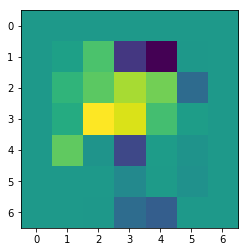

In [58]:
print(heatmap.shape)
plt.imshow(heatmap.reshape(7,7))

TypeError: ignored

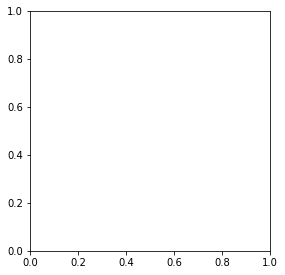

In [55]:
large_test_x = cv2.resize(test_x.reshape(28,28), (28*5, 28*5))
large_attention = cv2.resize(heatmap, (28*5, 28*5), interpolation = cv2.INTER_CUBIC)

plt.figure(figsize = (10,15))

plt.subplot(3,2,4)
plt.imshow(large_attention, 'jet', alpha = 0.5)
plt.axis('off')

plt.subplot(3,2,6)
plt.imshow(large_test_x, 'gray')
plt.imshow(large_attention, 'jet', alpha = 0.5)
plt.axis('off')
plt.show()